In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [37]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/Bahar812/Data-Mining-W8/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
df_origin = df
df_origin.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Annual Income (k$)": "AnnualIncome"})
df = df.rename(columns={"Spending Score (1-100)": "SpendingScore"})
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [41]:
# Check for null values in the dataset
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

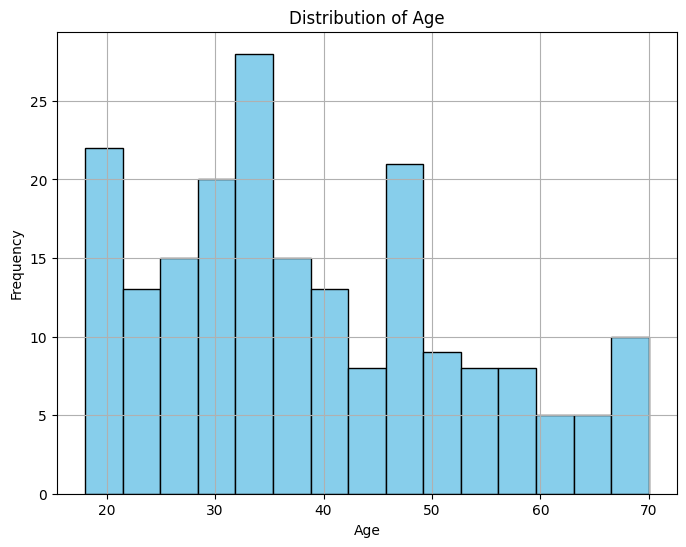

In [59]:
# make an insightful visualization and explain
import matplotlib.pyplot as plt

# Plot the distribution of Age
plt.figure(figsize=(8, 6))
plt.hist(df_origin['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




### Distribution of Age

The distribution of the "Age" column shows that the majority of customers fall between the ages of 18 and 70, with a peak in the 30s and 40s. The spread of ages indicates that the dataset covers a wide range of customers, which can provide insights into how different age groups behave in terms of their income and spending score.

- **Mean**: 38.85 years
- **Standard Deviation**: 13.97 years
- **Range**: From 18 years to 70 years


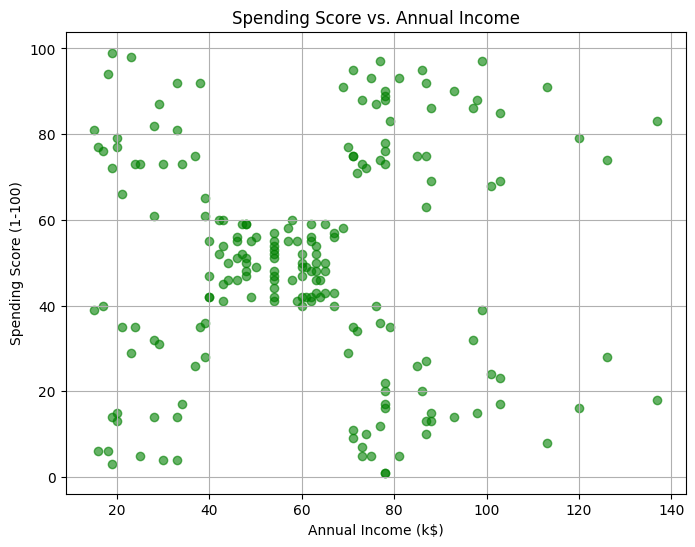

In [63]:
# make an insightful visualization and explain
plt.figure(figsize=(8, 6))
plt.scatter(df_origin['Annual Income (k$)'], df_origin['Spending Score (1-100)'], alpha=0.6, color='green')
plt.title('Spending Score vs. Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


### Relationship Between Annual Income and Spending Score

This scatter plot helps visualize the relationship between annual income and spending score. From the data, we can observe that there isn't a perfect linear relationship between income and spending. For example:

- Some individuals with low annual income still have high spending scores, which could indicate a willingness to spend or certain financial behaviors.
- People with higher incomes tend to have a wider range of spending scores, showing that higher income does not necessarily correlate with higher spending.

#### From the summary statistics:
- **Mean Annual Income**: 60.56 k$
- **Mean Spending Score**: 50.20
- The max annual income is 137k$, while the min is 15k$, and the spending score ranges from 1 to 99.


## Data Preprocessing

For this case study, we only use income and spending score

In [44]:
# create new dataframe that consist only annual income and spending score
df = df.iloc[:, -2:]
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [45]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=["Income", "Spending"])

df.head()


,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [46]:
# get stastical information on the new dataset
df.describe()

,Income,Spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

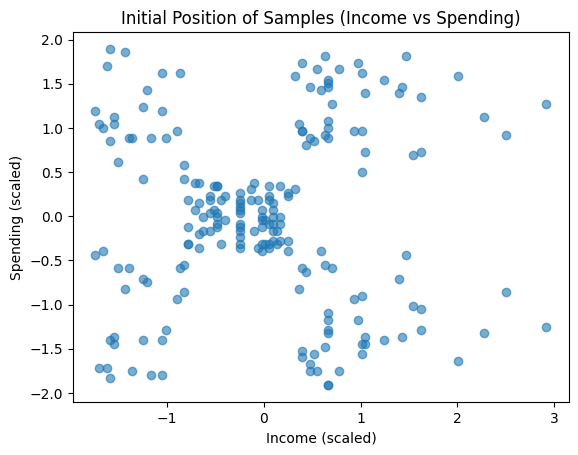

In [47]:
# Visualize the position
import matplotlib.pyplot as plt

# Scatter plot for Income vs Spending
plt.scatter(df["Income"], df["Spending"], alpha=0.6)
plt.xlabel("Income (scaled)")
plt.ylabel("Spending (scaled)")
plt.title("Initial Position of Samples (Income vs Spending)")
plt.show()


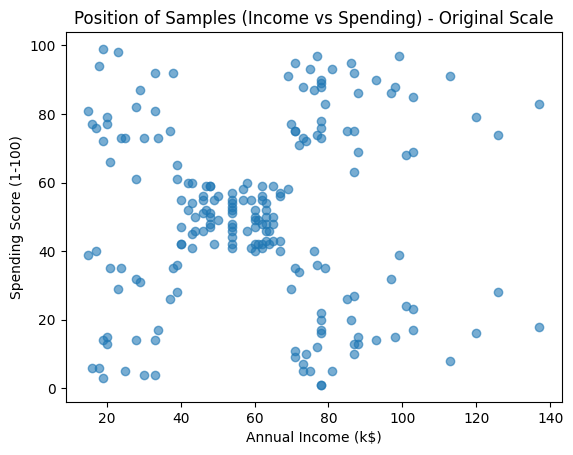

In [57]:
import matplotlib.pyplot as plt

# Assuming df_origin contains the original, unscaled data
# If df_origin is not defined, you need to use the original columns from the original dataframe

# Scatter plot for Annual Income vs Spending Score using original scale
plt.scatter(df_origin['Annual Income (k$)'], df_origin['Spending Score (1-100)'], alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Position of Samples (Income vs Spending) - Original Scale")
plt.show()


## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

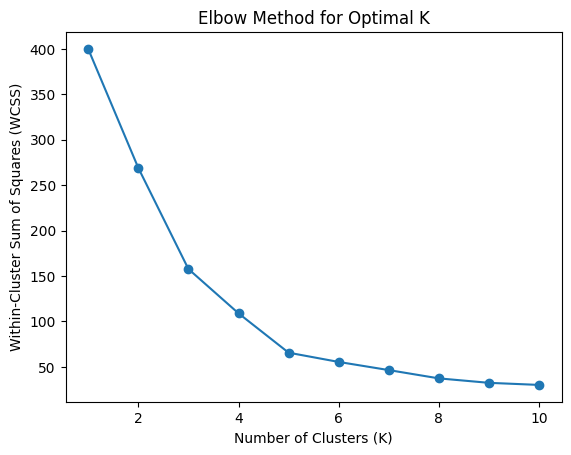

In [49]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define range for K
k_range = range(1, 11)

# List to store WCSS for each K
wcss = []

# Compute K-means for each K value in the range
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="random", max_iter=300, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Inertia: WCSS

# Plot the Elbow graph
plt.plot(k_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()


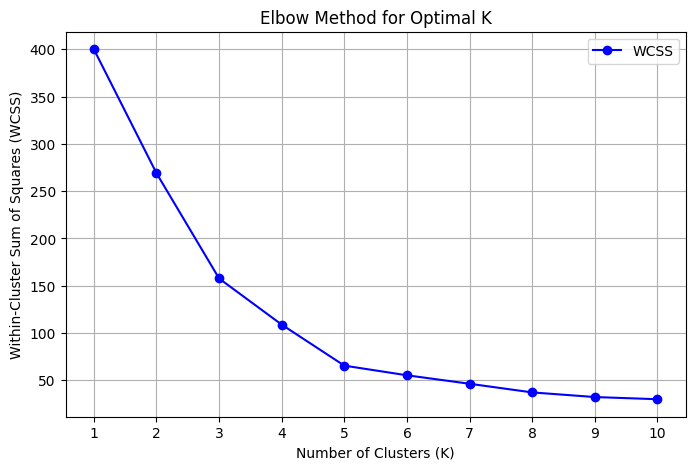

In [50]:
# manually visualize the elbow method using plotlib
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of K values to evaluate
k_range = range(1, 11)

# Initialize a list to store WCSS values for each K
wcss = []

# Calculate WCSS for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="random", max_iter=300, random_state=42)
    kmeans.fit(df)  # Fit the model on the data
    wcss.append(kmeans.inertia_)  # Append WCSS (inertia) for current K

# Manual visualization of the Elbow Method using Matplotlib
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b', label='WCSS')
plt.xticks(k_range)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.legend()
plt.show()


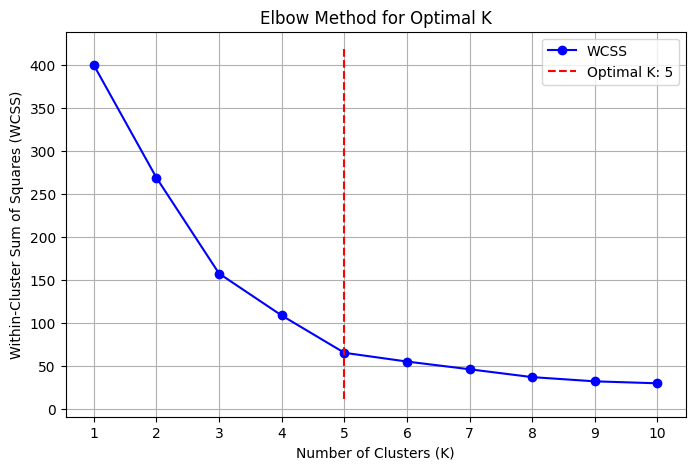

The optimal number of clusters (K) is: 5


In [51]:
# using kneelocator to find the elbow/knee
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Define the range of K values to evaluate
k_range = range(1, 11)

# Initialize a list to store WCSS values for each K
wcss = []

# Calculate WCSS for each K
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="random", max_iter=300, random_state=42)
    kmeans.fit(df)  # Fit the model on the data
    wcss.append(kmeans.inertia_)  # Append WCSS (inertia) for current K

# Use KneeLocator to find the elbow point
knee_locator = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
optimal_k = knee_locator.elbow

# Plot the Elbow Method with the identified elbow point
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b', label='WCSS')
plt.xticks(k_range)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")

# Mark the optimal K on the plot
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles="dashed", colors="red", label=f"Optimal K: {optimal_k}")
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal number of clusters (K) is: {optimal_k}")


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [52]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

Visualize your result based on income and spending. You also can show the final position of the centroid.

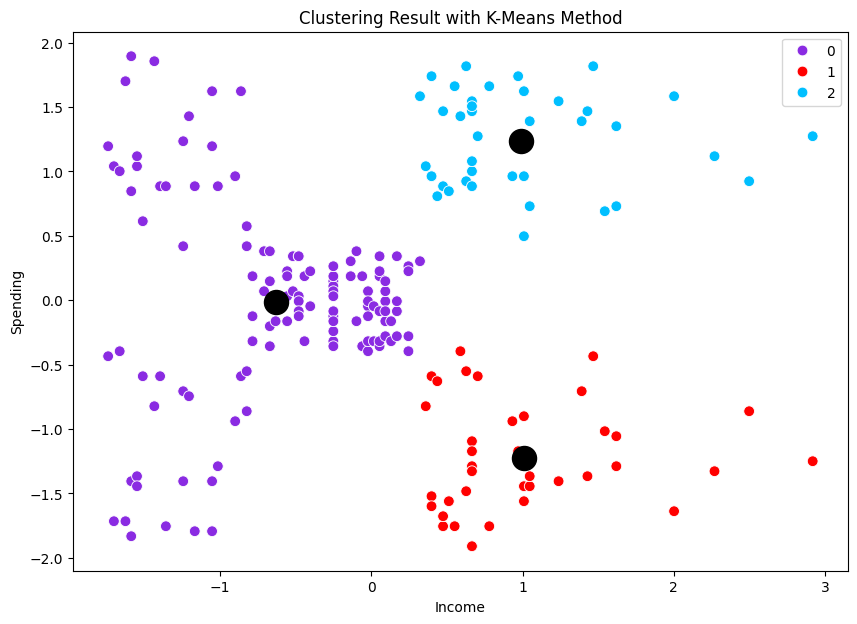

In [53]:
# visualize the result using scater chart
# visualize the result using scater chart
import seaborn as sns
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Income", y = "Spending", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Income")
plt.ylabel("Spending")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [54]:
# Assume df has been scaled, and you have cluster labels in y_pred.
# Separate the features from the cluster labels
scaled_df = df[["Income", "Spending"]]

# Inverse transform the scaled data to get the original values
original_df = pd.DataFrame(scaler.inverse_transform(scaled_df), columns=["Income", "Spending"])

# Add the cluster labels back to the original dataframe
original_df['Cluster'] = y_pred

# Analyze the clusters with the original values
print(original_df.head())


   Income  Spending  Cluster
0    15.0      39.0        0
1    15.0      81.0        0
2    16.0       6.0        0
3    16.0      77.0        0
4    17.0      40.0        0


In [55]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'Income': ['mean', 'std', 'min', 'max'],
                                              'Spending': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Income                                Spending                      \
             mean       std       min       max      mean       std       min   
cluster                                                                         
0       -0.626190  0.612157 -1.738999  0.322150 -0.014392  0.764562 -1.832378   
1        1.009200  0.621068  0.360319  2.917671 -1.225535  0.423774 -1.910021   
2        0.991583  0.622638  0.322150  2.917671  1.239503  0.363544  0.496916   

                   
              max  
cluster            
0        1.894492  
1       -0.395980  
2        1.816849

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

### Interpretation of Clustering Results

From the clustering analysis, the data has been grouped into three clusters based on the income and spending score variables. Below is a breakdown of the clusters:

#### Cluster 0:
- **Income**: Mean = -0.626, Standard Deviation = 0.612, Range = [-1.738, 0.322]
- **Spending**: Mean = -0.014, Standard Deviation = 0.765, Range = [-1.832, 1.894]

Cluster 0 contains customers with lower income and lower spending scores on average. These customers are likely to have limited financial resources, which could result in more cautious spending behavior.

#### Cluster 1:
- **Income**: Mean = 1.009, Standard Deviation = 0.621, Range = [0.360, 2.918]
- **Spending**: Mean = -1.226, Standard Deviation = 0.424, Range = [-1.910, -0.396]

Cluster 1 represents individuals with higher income but relatively low spending scores. This could indicate that people in this group earn more but are more conservative with their spending, potentially saving a larger proportion of their income.

#### Cluster 2:
- **Income**: Mean = 0.992, Standard Deviation = 0.623, Range = [0.322, 2.918]
- **Spending**: Mean = 1.240, Standard Deviation = 0.364, Range = [0.497, 1.817]

Cluster 2 represents high-income individuals with a higher spending score. This group likely demonstrates more financial freedom and a willingness to spend, which could indicate a more lavish or luxury-driven lifestyle.

### Suggestions for the Company

1. **Targeted Marketing Strategies**:
   - **Cluster 0**: This group could benefit from targeted marketing campaigns that emphasize affordable products or services, discounts, and special offers. They may be more price-sensitive, so offering promotions or lower-cost items could drive engagement and increase spending.
   - **Cluster 1**: For this group, the company can consider offering products or services that encourage savings, such as investments or financial planning tools. Additionally, offering exclusive offers or rewards for larger purchases could entice them to increase their spending behavior.
   - **Cluster 2**: With higher-income and higher-spending individuals, marketing strategies could focus on premium or luxury products. Personalized offers, exclusive access to high-end products, or loyalty programs could resonate well with this cluster.

2. **Customer Engagement**:
   - **Cluster 0**: Engaging this group through value-driven content, educational resources about managing finances, and lower-price offerings will help build trust and loyalty.
   - **Cluster 1**: Encourage engagement with value-added services like financial advisory, lifestyle management tools, or rewards programs tailored to their income level.
   - **Cluster 2**: Personalized services, such as VIP offers, early access to new products, or special invitations to events, could be effective in fostering long-term loyalty and increasing their overall spending.

3. **Product and Service Development**:
   - For **Cluster 0**, the company can focus on creating more budget-friendly options, bundling products together at a discount, or introducing loyalty programs that offer gradual benefits to low-spending individuals.
   - For **Cluster 1**, the company may consider introducing products that align with a more conservative spending habit, such as long-term value or investment products, which could appeal to this group's financial behavior.
   - For **Cluster 2**, offering high-end products or services and enhancing exclusivity could be beneficial, tapping into their higher willingness to spend.

### Conclusion

By understanding the characteristics of each cluster, the company can create more tailored marketing campaigns, product offerings, and customer engagement strategies that resonate with each segment’s unique financial behavior.


<write here>